/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


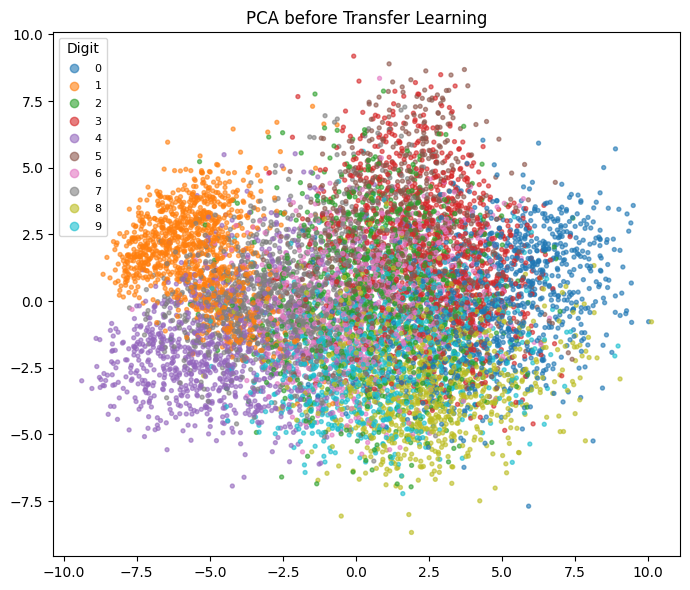

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


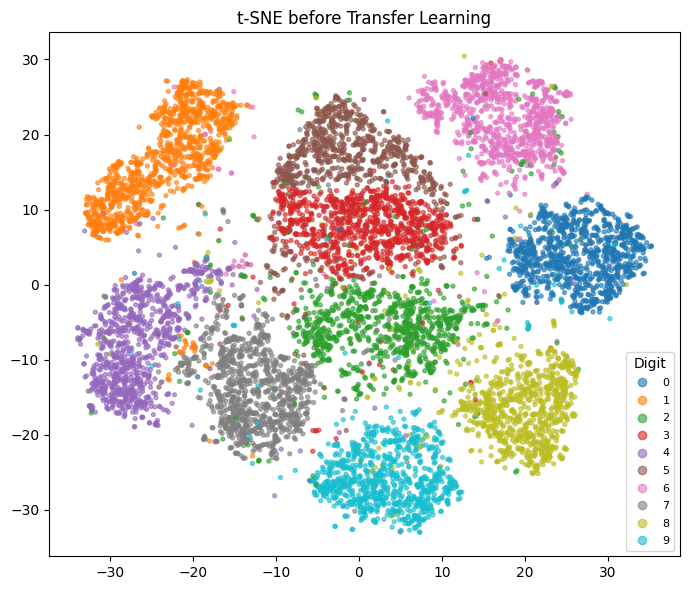

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


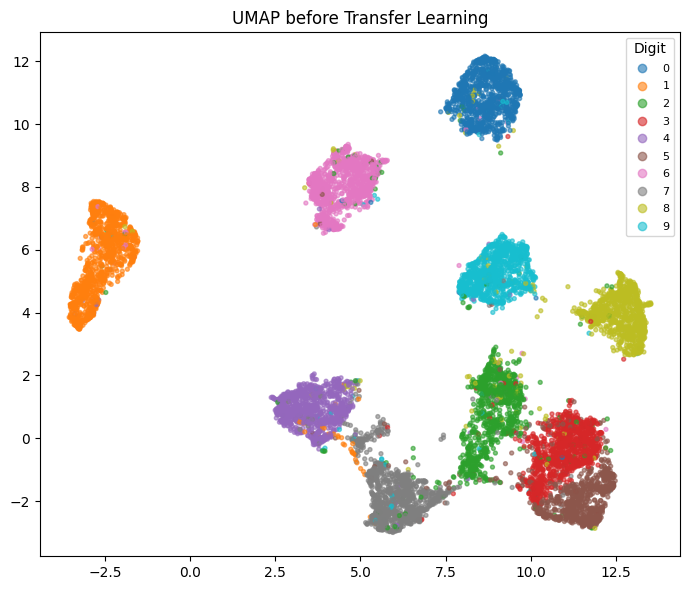

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


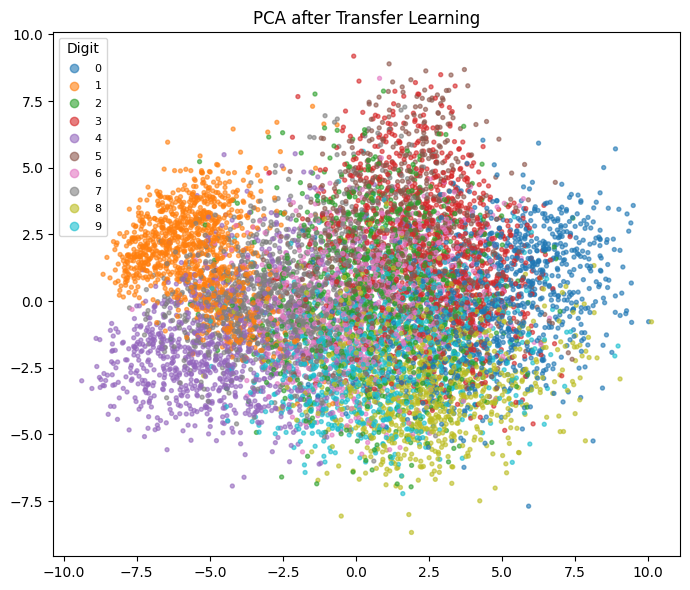

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


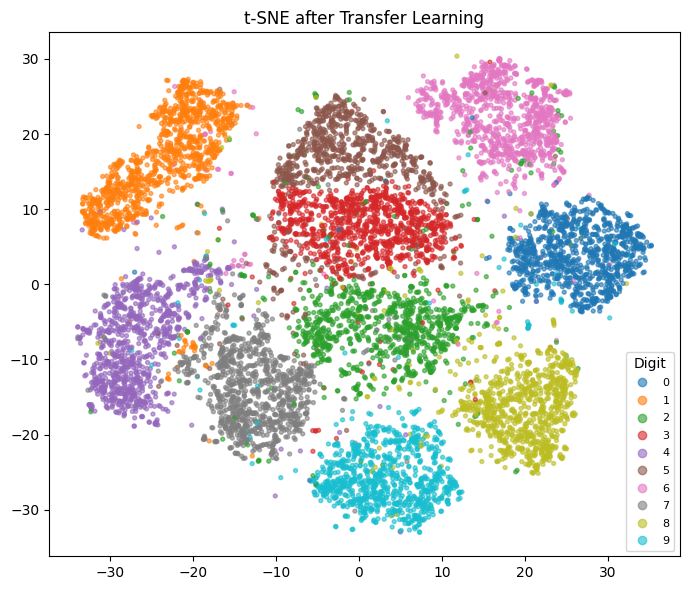

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


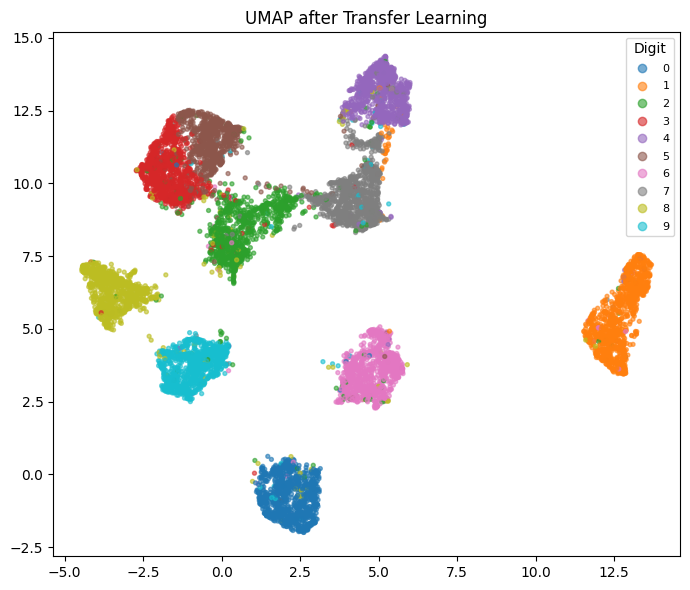

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet18
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
mnist_full = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
subset = torch.utils.data.Subset(mnist_full, range(10000))
loader = torch.utils.data.DataLoader(subset, batch_size=128, shuffle=False)

model = resnet18(pretrained=True)
model.fc = torch.nn.Identity()
model = model.to(device)
model.eval()

features = []
labels = []

with torch.no_grad():
    for images, targets in loader:
        images = images.to(device)
        out = model(images).cpu().numpy()
        features.append(out)
        labels.append(targets.numpy())

features = np.concatenate(features)
labels = np.concatenate(labels)

def plot_2d(features, labels, title, reducer):
    reduced = reducer.fit_transform(features)
    plt.figure(figsize=(7, 6))
    scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='tab10', alpha=0.6, s=8)
    plt.legend(*scatter.legend_elements(), title="Digit", fontsize=8)
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_2d(features, labels, "PCA before Transfer Learning", PCA(n_components=2))
plot_2d(features, labels, "t-SNE before Transfer Learning", TSNE(n_components=2, perplexity=50, n_iter=500))
plot_2d(features, labels, "UMAP before Transfer Learning", umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1))

model = resnet18(pretrained=True)
model.fc = torch.nn.Linear(model.fc.in_features, 10)
model = model.to(device)

model.fc = torch.nn.Identity()
model.eval()

features_after = []
with torch.no_grad():
    for images, _ in loader:
        images = images.to(device)
        out = model(images).cpu().numpy()
        features_after.append(out)

features_after = np.concatenate(features_after)

plot_2d(features_after, labels, "PCA after Transfer Learning", PCA(n_components=2))
plot_2d(features_after, labels, "t-SNE after Transfer Learning", TSNE(n_components=2, perplexity=50, n_iter=500))
plot_2d(features_after, labels, "UMAP after Transfer Learning", umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1))
